In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report

# Load Dataset
data = pd.read_csv("Impact_of_Remote_Work_on_Mental_Health.csv")
data.head()


,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


Numerical Features Summary:
               Age  Years_of_Experience  Hours_Worked_Per_Week  \
count  5000.000000          5000.000000            5000.000000   
mean     40.995000            17.810200              39.614600   
std      11.296021            10.020412              11.860194   
min      22.000000             1.000000              20.000000   
25%      31.000000             9.000000              29.000000   
50%      41.000000            18.000000              40.000000   
75%      51.000000            26.000000              50.000000   
max      60.000000            35.000000              60.000000   

       Number_of_Virtual_Meetings  Work_Life_Balance_Rating  \
count                 5000.000000               5000.000000   
mean                     7.559000                  2.984200   
std                      4.636121                  1.410513   
min                      0.000000                  1.000000   
25%                      4.000000                  2.000000   

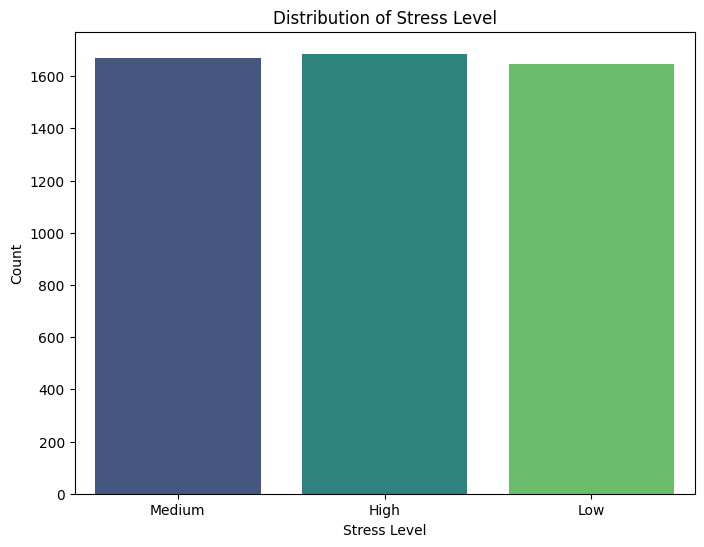

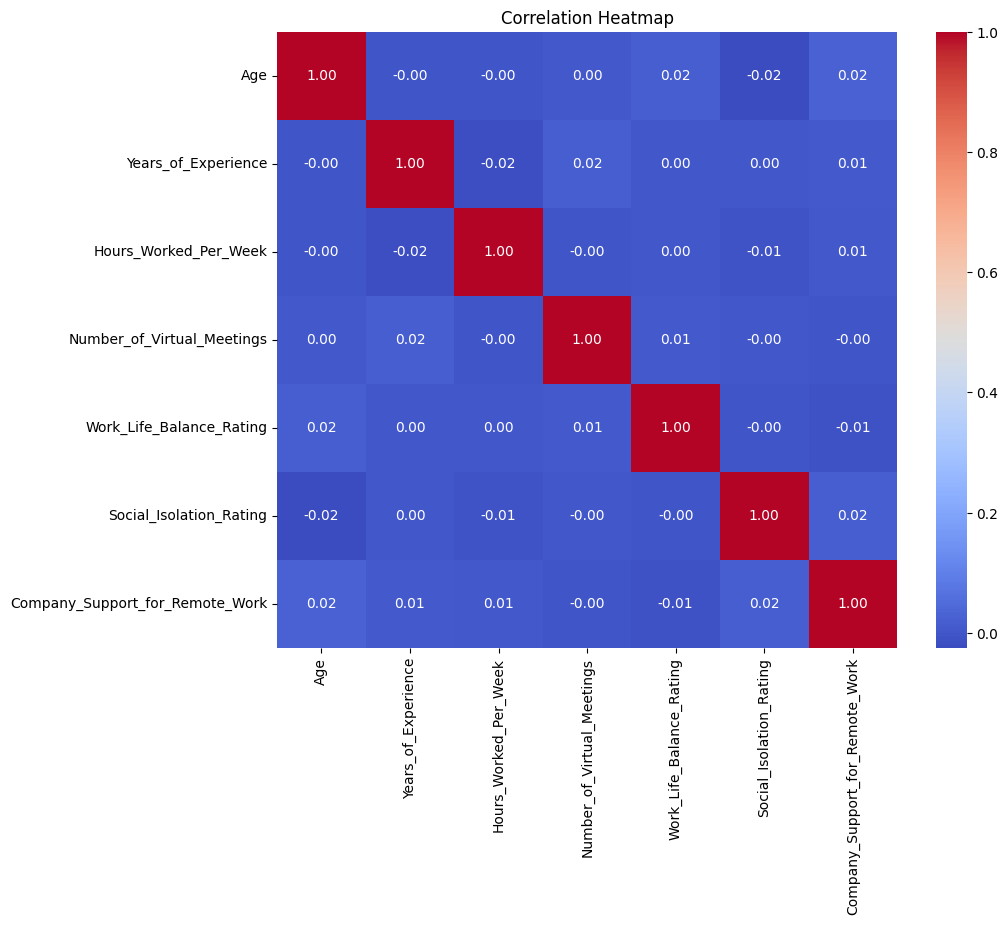

In [4]:
# Summary statistics for numerical columns
print("Numerical Features Summary:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Distribution of target variable (Stress_Level)
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Stress_Level', palette='viridis', hue='Stress_Level', dodge=False, legend=False)
plt.title('Distribution of Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()

# Select only numerical features for correlation analysis
numerical_features = data.select_dtypes(include=['int64', 'float64'])

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [5]:
# Encode categorical features
categorical_features = data.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in categorical_features:
    data[col] = le.fit_transform(data[col])

# Define features and target
X = data.drop(columns=['Stress_Level'])  # Drop the target column
y = data['Stress_Level']                # Target column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predictions
y_pred_gnb = gnb.predict(X_test)

# Accuracy Score
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Gaussian Naive Bayes Accuracy: {accuracy_gnb:.2f}")


Gaussian Naive Bayes Accuracy: 0.33


In [7]:
# Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Predictions
y_pred_mnb = mnb.predict(X_test)

# Accuracy Score
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print(f"Multinomial Naive Bayes Accuracy: {accuracy_mnb:.2f}")


Multinomial Naive Bayes Accuracy: 0.33


In [8]:
# Confusion Matrix for GaussianNB
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
print("\nGaussian Naive Bayes Confusion Matrix:")
print(conf_matrix_gnb)

# Cross-validation
cv_scores_gnb = cross_val_score(gnb, X, y, cv=5)
print("\nGaussian Naive Bayes Cross-Validation Scores:")
print(cv_scores_gnb)
print(f"Mean CV Accuracy: {cv_scores_gnb.mean():.2f}")



Gaussian Naive Bayes Confusion Matrix:
[[200 135 161]
 [186 127 190]
 [191 141 169]]

Gaussian Naive Bayes Cross-Validation Scores:
[0.335 0.339 0.355 0.324 0.344]
Mean CV Accuracy: 0.34


In [11]:
# Check the unique values in Stress_Level
print("Unique values in Stress_Level:", data['Stress_Level'].unique())

# Check the unique values after encoding
print("Classes in Stress_Level after Label Encoding:", le.classes_)



Unique values in Stress_Level: [2 0 1]
Classes in Stress_Level after Label Encoding: ['Africa' 'Asia' 'Europe' 'North America' 'Oceania' 'South America']


Unique labels in y_test: [0 1 2]


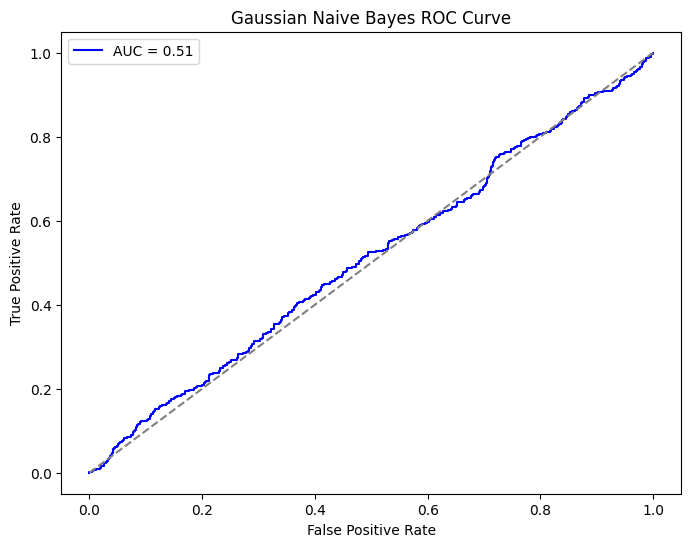

In [12]:
# Ensure 'pos_label' is a valid label from the dataset
print("Unique labels in y_test:", np.unique(y_test))

# Select a valid positive label (e.g., the highest encoded value)
pos_label = np.max(np.unique(y_test))

# Compute the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_gnb, pos_label=pos_label)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Gaussian Naive Bayes ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [13]:
# Fit LabelEncoder to the full range of Stress_Level values
le = LabelEncoder()
data['Stress_Level'] = le.fit_transform(data['Stress_Level'])

# Verify all encoded classes
print("Encoded classes:", le.classes_)


Encoded classes: [0 1 2]


In [14]:
# Print Classification Report
print("Gaussian Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_gnb))

print("Multinomial Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_mnb))


Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.40      0.37       496
           1       0.32      0.25      0.28       503
           2       0.33      0.34      0.33       501

    accuracy                           0.33      1500
   macro avg       0.33      0.33      0.33      1500
weighted avg       0.33      0.33      0.33      1500

Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.02      0.03       496
           1       0.33      0.46      0.38       503
           2       0.34      0.51      0.41       501

    accuracy                           0.33      1500
   macro avg       0.28      0.33      0.27      1500
weighted avg       0.28      0.33      0.28      1500

